# SuPreMo-Akita weighted scores

In this walkthrough, we will run get_Akita_scores on CTCF binding site deletions, which we generated in [custom_perturbations.ipynb](https://github.com/ketringjoni/Akita_variant_scoring/blob/main/walkthroughs/custom_perturbations.ipynb) and use genes as weights.

To do so, we've run the following command (the output of the following cell) in the terminal. By changing the variables below, you can get a command that fits your custom set of perturbations. Note: there are more arguments available that are not included here.  

In [78]:
import pandas as pd
import numpy as np
import os
from collections import Counter

In [79]:
# Change the following paths to match your working directory/input file/output files

data_dir = 'test_data/custom_perturbations/'

in_file = f'{data_dir}input/CTCF_del_symb_alleles.txt' # Input directory
directory = f'{data_dir}weighted_output' # Output directory

In [80]:
# Write command

shift_by = '-1 0 1' # Shift sequences by 1 bp left and right
revcomp = 'add_revcomp' # Also score the reverse complement of all sequences
file = 'CTCF_del_weighted' # Output files prefix
roi = 'genes'
roi_weights = 0.05

out_file = os.path.join(directory, file) # Path to output files

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file,
      '--shift_by', shift_by,
      '--revcomp', revcomp,
      '--file', file,
      '--dir', directory,
      '--get_Akita_scores',
      '--get_maps',
      '--get_tracks',
      '--roi', roi,
      '--roi_weight', roi_weights)


Run this command in the main directory:

python scripts/SuPreMo.py test_data/custom_perturbations/input/CTCF_del_symb_alleles.txt --shift_by -1 0 1 --revcomp add_revcomp --file CTCF_del_weighted --dir test_data/custom_perturbations/weighted_output --get_Akita_scores --get_maps --get_tracks --roi genes --roi_weight 0.05


In [81]:
# Read input

import sys
sys.path.insert(0, '../scripts')

import reading_utils
reading_utils.var_set_size = 10000000000

variants = reading_utils.read_input(f'../{in_file}', 0)
variants[:10]

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN
0,chr1,100276250,-,-,100276269,DEL,19
1,chr1,101106697,-,-,101106716,DEL,19
2,chr1,101159421,-,-,101159440,DEL,19
3,chr1,101442377,-,-,101442396,DEL,19
4,chr1,101526743,-,-,101526762,DEL,19
5,chr1,101595702,-,-,101595721,DEL,19
6,chr1,101693506,-,-,101693525,DEL,19
7,chr1,101744879,-,-,101744898,DEL,19
8,chr1,102007853,-,-,102007872,DEL,19
9,chr1,10192988,-,-,10193007,DEL,19


# Get scores

In [82]:
# Read scores file

scores = pd.read_csv(f'../{out_file}_scores', sep = '\t')
scores.iloc[:10,:10]

,var_index,mse_HFF_-1,mse_0.05-weighted_HFF_-1,corr_HFF_-1,corr_unweighted_HFF_-1,corr_0.05-weighted_HFF_-1,mse_HFF_0,mse_0.05-weighted_HFF_0,corr_HFF_0,corr_unweighted_HFF_0
0,0,0.003009,0.003331,0.984663,0.024730,0.026234,0.006867,0.006255,0.960436,0.047487
1,1,0.004472,0.003365,0.992411,0.012973,0.007744,0.004990,0.004356,0.991197,0.014773
2,2,0.006182,0.006601,0.989617,0.020733,0.014228,0.009294,0.007006,0.984339,0.026835
3,3,0.014067,0.011918,0.958524,0.055419,0.022448,0.004430,0.002603,0.984087,0.020359
4,4,0.005012,0.003660,0.973819,0.038931,0.021792,0.004997,0.007633,0.980311,0.029282
5,5,0.003381,0.004208,0.984231,0.030802,0.017601,0.003852,0.004384,0.981589,0.031710
6,6,0.004194,0.002691,0.964545,0.072446,0.041650,0.003161,0.002456,0.979445,0.031958
7,7,0.003248,0.001671,0.968563,0.052541,0.035840,0.005499,0.004139,0.931995,0.116087
8,8,0.002732,0.003016,0.878060,0.127131,0.058268,0.002384,0.006307,0.885885,0.146404
9,9,0.003190,0.003032,0.990839,0.012123,0.011900,0.003946,0.004137,0.990144,0.013410


In [83]:
# These are all the scores that were calculated 
scores.columns[1:]

Index(['mse_HFF_-1', 'mse_0.05-weighted_HFF_-1', 'corr_HFF_-1',
       'corr_unweighted_HFF_-1', 'corr_0.05-weighted_HFF_-1', 'mse_HFF_0',
       'mse_0.05-weighted_HFF_0', 'corr_HFF_0', 'corr_unweighted_HFF_0',
       'corr_0.05-weighted_HFF_0', 'mse_HFF_0_revcomp',
       'mse_0.05-weighted_HFF_0_revcomp', 'corr_HFF_0_revcomp',
       'corr_unweighted_HFF_0_revcomp', 'corr_0.05-weighted_HFF_0_revcomp',
       'mse_HFF_1', 'mse_0.05-weighted_HFF_1', 'corr_HFF_1',
       'corr_unweighted_HFF_1', 'corr_0.05-weighted_HFF_1'],
      dtype='object')

In [84]:
# Add scores dataframe to input dataframe to match them with information about the perturbations

scores = pd.concat([variants, scores], axis = 1)
scores.iloc[:10,:10]

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN,var_index,mse_HFF_-1,mse_0.05-weighted_HFF_-1
0,chr1,100276250,-,-,100276269,DEL,19,0,0.003009,0.003331
1,chr1,101106697,-,-,101106716,DEL,19,1,0.004472,0.003365
2,chr1,101159421,-,-,101159440,DEL,19,2,0.006182,0.006601
3,chr1,101442377,-,-,101442396,DEL,19,3,0.014067,0.011918
4,chr1,101526743,-,-,101526762,DEL,19,4,0.005012,0.003660
5,chr1,101595702,-,-,101595721,DEL,19,5,0.003381,0.004208
6,chr1,101693506,-,-,101693525,DEL,19,6,0.004194,0.002691
7,chr1,101744879,-,-,101744898,DEL,19,7,0.003248,0.001671
8,chr1,102007853,-,-,102007872,DEL,19,8,0.002732,0.003016
9,chr1,10192988,-,-,10193007,DEL,19,9,0.003190,0.003032


## Get map pairs where weights have strong effect on score

In [85]:
scores['weight_diff'] = [x-y for x,y in zip(scores['mse_0.05-weighted_HFF_0'], scores['mse_HFF_0'])]

In [86]:
scores.sort_values('weight_diff')

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN,var_index,mse_HFF_-1,mse_0.05-weighted_HFF_-1,...,mse_0.05-weighted_HFF_0_revcomp,corr_HFF_0_revcomp,corr_unweighted_HFF_0_revcomp,corr_0.05-weighted_HFF_0_revcomp,mse_HFF_1,mse_0.05-weighted_HFF_1,corr_HFF_1,corr_unweighted_HFF_1,corr_0.05-weighted_HFF_1,weight_diff
2,chr1,101159421,-,-,101159440,DEL,19,2,0.006182,0.006601,...,0.017015,0.981446,0.021482,0.018518,0.011341,0.012061,0.983993,0.030186,0.021915,-2.287974e-03
3,chr1,101442377,-,-,101442396,DEL,19,3,0.014067,0.011918,...,0.003352,0.967367,0.041829,0.023047,0.009354,0.008074,0.969578,0.042530,0.024658,-1.827471e-03
7,chr1,101744879,-,-,101744898,DEL,19,7,0.003248,0.001671,...,0.008784,0.924625,0.152726,0.083691,0.002999,0.001791,0.977769,0.038115,0.019781,-1.360122e-03
6,chr1,101693506,-,-,101693525,DEL,19,6,0.004194,0.002691,...,0.008175,0.892433,0.177719,0.113820,0.002438,0.001545,0.976089,0.050149,0.026485,-7.056071e-04
1,chr1,101106697,-,-,101106716,DEL,19,1,0.004472,0.003365,...,0.003231,0.995586,0.007864,0.005651,0.002163,0.002343,0.996655,0.006361,0.004146,-6.334834e-04
0,chr1,100276250,-,-,100276269,DEL,19,0,0.003009,0.003331,...,0.002426,0.986691,0.022643,0.021450,0.007648,0.007521,0.956561,0.057416,0.058032,-6.118089e-04
41,chr1,11139402,-,-,11139421,DEL,19,41,0.013239,0.016320,...,0.007710,0.984732,0.025481,0.029438,0.006609,0.007163,0.984191,0.022150,0.021026,-5.286051e-04
25,chr1,107671377,-,-,107671396,DEL,19,25,0.004087,0.002466,...,0.001627,0.987231,0.023433,0.004229,0.001344,0.001666,0.995726,0.007141,0.003768,-4.336202e-04
28,chr1,108094709,-,-,108094728,DEL,19,28,0.004303,0.003672,...,0.015647,0.973702,0.033782,0.037973,0.003731,0.003837,0.992770,0.013079,0.009306,-1.925356e-04
26,chr1,107873874,-,-,107873893,DEL,19,26,0.003587,0.003048,...,0.009504,0.988399,0.015049,0.021516,0.005990,0.003542,0.987863,0.021728,0.013715,-1.192428e-04


In [88]:
example_maps = [2,3,10,22]

# Maps files

In [89]:
import sys
sys.path.insert(0, '../scripts')

import math
import plotting_utils

In [90]:
# Read in maps
maps = np.load(f'../{out_file}_maps.npy', allow_pickle="TRUE").item()

In [91]:
maps.keys()

dict_keys(['0_maps_HFF_-1', '0_maps_HFF_0', '0_maps_HFF_0_revcomp', '0_maps_HFF_1', '1_maps_HFF_-1', '1_maps_HFF_0', '1_maps_HFF_0_revcomp', '1_maps_HFF_1', '2_maps_HFF_-1', '2_maps_HFF_0', '2_maps_HFF_0_revcomp', '2_maps_HFF_1', '3_maps_HFF_-1', '3_maps_HFF_0', '3_maps_HFF_0_revcomp', '3_maps_HFF_1', '4_maps_HFF_-1', '4_maps_HFF_0', '4_maps_HFF_0_revcomp', '4_maps_HFF_1', '5_maps_HFF_-1', '5_maps_HFF_0', '5_maps_HFF_0_revcomp', '5_maps_HFF_1', '6_maps_HFF_-1', '6_maps_HFF_0', '6_maps_HFF_0_revcomp', '6_maps_HFF_1', '7_maps_HFF_-1', '7_maps_HFF_0', '7_maps_HFF_0_revcomp', '7_maps_HFF_1', '8_maps_HFF_-1', '8_maps_HFF_0', '8_maps_HFF_0_revcomp', '8_maps_HFF_1', '9_maps_HFF_-1', '9_maps_HFF_0', '9_maps_HFF_0_revcomp', '9_maps_HFF_1', '10_maps_HFF_-1', '10_maps_HFF_0', '10_maps_HFF_0_revcomp', '10_maps_HFF_1', '11_maps_HFF_-1', '11_maps_HFF_0', '11_maps_HFF_0_revcomp', '11_maps_HFF_1', '12_maps_HFF_-1', '12_maps_HFF_0', '12_maps_HFF_0_revcomp', '12_maps_HFF_1', '13_maps_HFF_-1', '13_maps_H

In [92]:
# Choose the conditions of the map you would like to extract

var_index = example_maps[0] # Row number from input

# Leave the following as is if not specified in the run
shift = 0 
revcomp = ''


# Tracks files

## Disruption tracks

In [93]:
# Read in tracks

tracks = np.load(f'../{out_file}_tracks.npy', allow_pickle="TRUE").item()

In [94]:
tracks.keys()

dict_keys(['0_mse_track_HFF_-1', '0_corr_track_HFF_-1', '0_mse_track_HFF_0', '0_corr_track_HFF_0', '0_mse_track_HFF_0_revcomp', '0_corr_track_HFF_0_revcomp', '0_mse_track_HFF_1', '0_corr_track_HFF_1', '1_mse_track_HFF_-1', '1_corr_track_HFF_-1', '1_mse_track_HFF_0', '1_corr_track_HFF_0', '1_mse_track_HFF_0_revcomp', '1_corr_track_HFF_0_revcomp', '1_mse_track_HFF_1', '1_corr_track_HFF_1', '2_mse_track_HFF_-1', '2_corr_track_HFF_-1', '2_mse_track_HFF_0', '2_corr_track_HFF_0', '2_mse_track_HFF_0_revcomp', '2_corr_track_HFF_0_revcomp', '2_mse_track_HFF_1', '2_corr_track_HFF_1', '3_mse_track_HFF_-1', '3_corr_track_HFF_-1', '3_mse_track_HFF_0', '3_corr_track_HFF_0', '3_mse_track_HFF_0_revcomp', '3_corr_track_HFF_0_revcomp', '3_mse_track_HFF_1', '3_corr_track_HFF_1', '4_mse_track_HFF_-1', '4_corr_track_HFF_-1', '4_mse_track_HFF_0', '4_corr_track_HFF_0', '4_mse_track_HFF_0_revcomp', '4_corr_track_HFF_0_revcomp', '4_mse_track_HFF_1', '4_corr_track_HFF_1', '5_mse_track_HFF_-1', '5_corr_track_HFF

In [95]:
# Choose the conditions of the map you would like to extract

var_index = example_maps[0] # Row number from input
scoring_method = 'mse' # Scoring method used. Default is mse (mean squared error) and corr (spearman correlation)

# Leave the following as is if not specified in the run
shift = 0 
revcomp = ''


In [96]:
# Get disruption track

variant_id = f'{var_index}_{scoring_method}_track_HFF_{shift}{revcomp}'

disruption_track = tracks[variant_id]


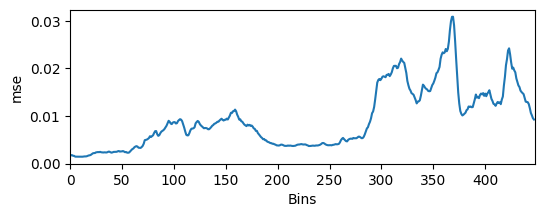

In [97]:
# Plot disruption track

plotting_utils.plot_disruption_tracks(disruption_track, scoring_method)

## Weight track

In [98]:
import get_Akita_scores_utils
import get_roi_utils
from pybedtools import BedTool
genome = 'hg38'

get_Akita_scores_utils.BedTool = BedTool
get_Akita_scores_utils.roi_coords_BED = get_roi_utils.get_roi(roi, genome)


def get_weight_track(disruption_track, roi_in_map, roi_weight):


    # Get the bins that correspond regions of interest (roi)
    
    roi_bins = []
    for i in range(len(roi_in_map)):
        
        bins_i = list(range(roi_in_map.iloc[i].Start, roi_in_map.iloc[i].End + 1))
        roi_bins.append(bins_i)
    
    roi_bins = [item for group in roi_bins for item in group]
    
    
    # Get scaling factor and background weight 
    if len(roi_bins) == 0:
        
        background_weight = 1

    elif roi_weight < 1 and roi_weight > 0:
        
        background_weight = 1
        
        n = len(roi_bins)
        w = roi_weight
        l = len(disruption_track)

        scale = (((n*w)-(l*w))/((n*w)-n))/(n/l)

    elif roi_weight == 1:
        
        background_weight = 0
        scale = 1
        
    else:
        
        raise ValueError('roi_weight provided not compatible.')


    # Get weight track
    
    weight_track = np.array([background_weight]*len(disruption_track))
    for i in roi_bins:
        weight_track[i] = scale
    # Add nans to weight track
    weight_track[np.isnan(disruption_track)] = 0


    return weight_track

## Plot

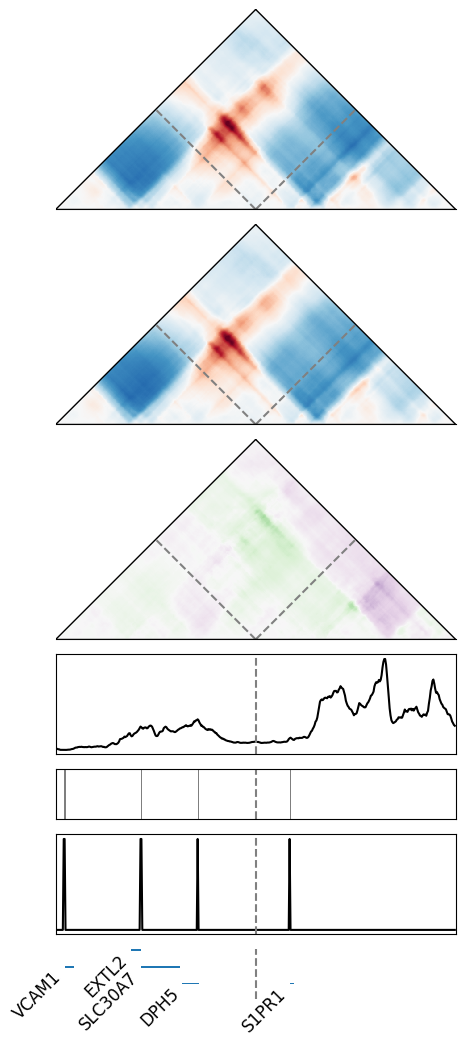

In [99]:
# Plot maps for the chosen variant
var_index = example_maps[0]
variant_id = f'{var_index}_maps_HFF_{shift}{revcomp}'

REF_pred, ALT_pred = maps[variant_id][:2]
REF_pred, ALT_pred = [get_Akita_scores_utils.map_from_vector(x) for x in [REF_pred, ALT_pred]]

rel_pos_map, map_start_coord = maps[variant_id][2:]

CHR = scores[scores.var_index == var_index].CHROM.values[0]

if 'SVLEN' in variants.columns:
    SVLEN = variants.iloc[var_index].SVLEN
    SVTYPE = variants.iloc[var_index].SVTYPE
else:
    SVTYPE, SVLEN = '-', '-'

genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)

# Get roi in map and weight track 
roi_in_map = get_Akita_scores_utils.get_roi_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
weight_track = get_weight_track(disruption_track, roi_in_map, roi_weights)

lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

plotting_utils.plot_maps_roi([REF_pred, ALT_pred], genes_in_map, lines, roi_in_map, disruption_track, weight_track, scale = 1)

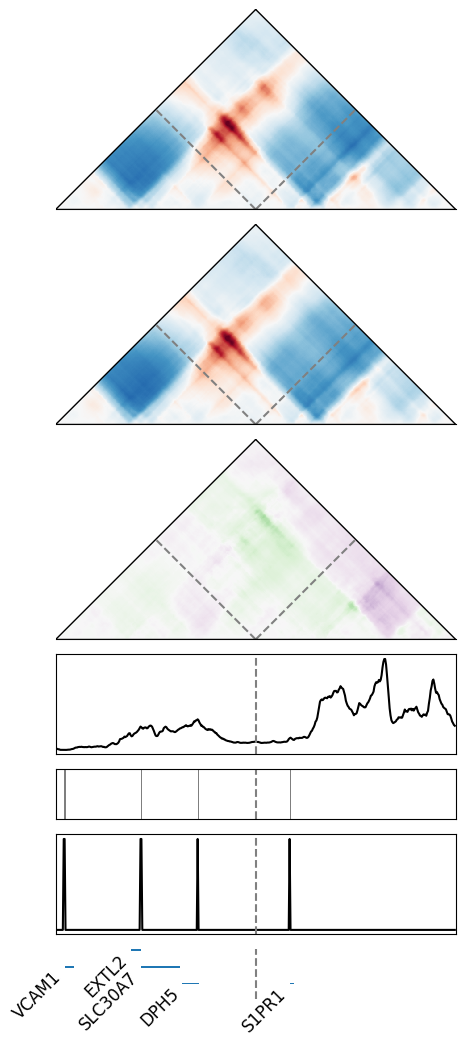

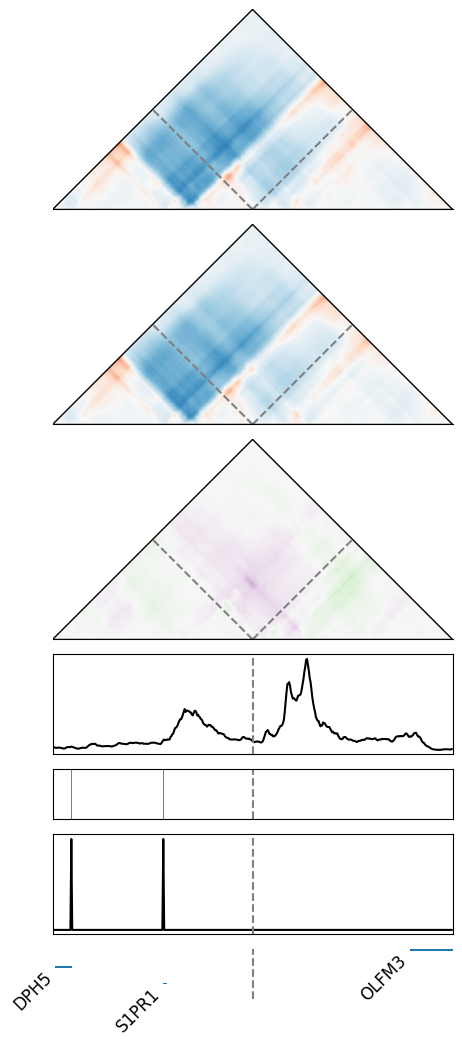

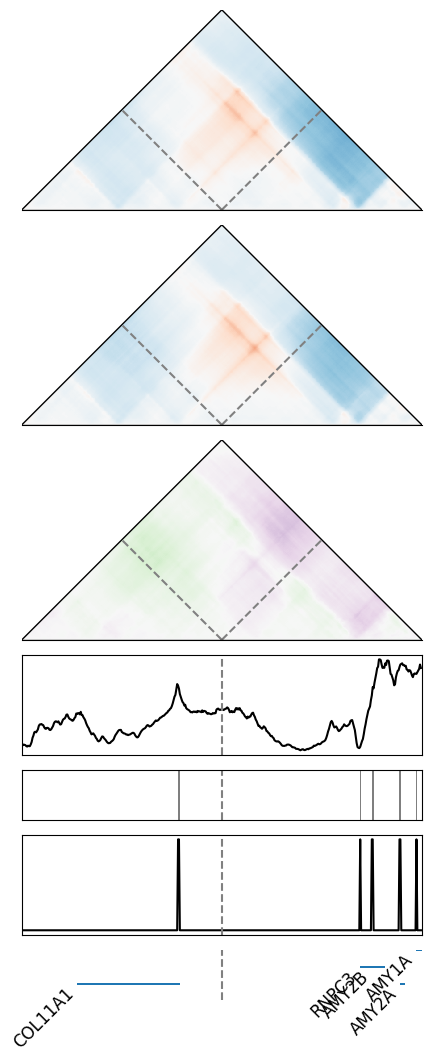

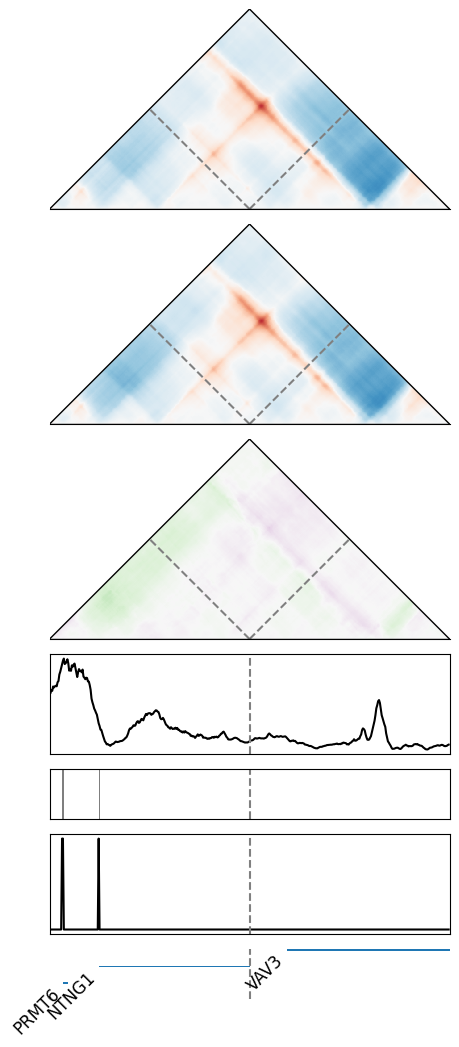

In [100]:
# Plot map pairs where the weights changed the score the most

for var_index in example_maps:
    
    variant_id = f'{var_index}_{scoring_method}_track_HFF_{shift}{revcomp}'
    disruption_track = tracks[variant_id]
    
    variant_id = f'{var_index}_maps_HFF_{shift}{revcomp}'
    REF_pred, ALT_pred = maps[variant_id][:2]
    REF_pred, ALT_pred = [get_Akita_scores_utils.map_from_vector(x) for x in [REF_pred, ALT_pred]]
    
    rel_pos_map, map_start_coord = maps[variant_id][2:]
    
    CHR = scores[scores.var_index == var_index].CHROM.values[0]
    
    if 'SVLEN' in variants.columns:
        SVLEN = variants.iloc[var_index].SVLEN
        SVTYPE = variants.iloc[var_index].SVTYPE
    else:
        SVTYPE, SVLEN = '-', '-'
    
    genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    
    # Get roi in map and weight track 
    roi_in_map = get_Akita_scores_utils.get_roi_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    weight_track = get_weight_track(disruption_track, roi_in_map, roi_weights)
    
    lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)
    
    plotting_utils.plot_maps_roi([REF_pred, ALT_pred], genes_in_map, lines, roi_in_map, disruption_track, weight_track, scale = 1)